<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/face_ex_disc_classification_CNN_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os


In [3]:
cv2.imread('/content/drive/MyDrive/Fundus image dataset/splitted')


In [4]:
os.listdir('/content/drive/MyDrive/Fundus image dataset/splitted')

['train', 'val']

In [5]:
os.listdir('/content/drive/MyDrive/Fundus image dataset/splitted/train')



['Large optic cup', 'Normal optic cup']

In [6]:
os.listdir('/content/drive/MyDrive/Fundus image dataset/splitted/val')



['Large optic cup', 'Normal optic cup']

In [ ]:
cv2.imread('/content/drive/MyDrive/Fundus image dataset/splitted/train/Normal optic cup/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG')




In [ ]:
cv2.imread('/content/drive/MyDrive/Fundus image dataset/splitted/train/Large optic cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG')




In [9]:
# looking at image dimensions
cv2.imread('/content/drive/MyDrive/Fundus image dataset/splitted/train/Normal optic cup/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG').shape




(2572, 3046, 3)

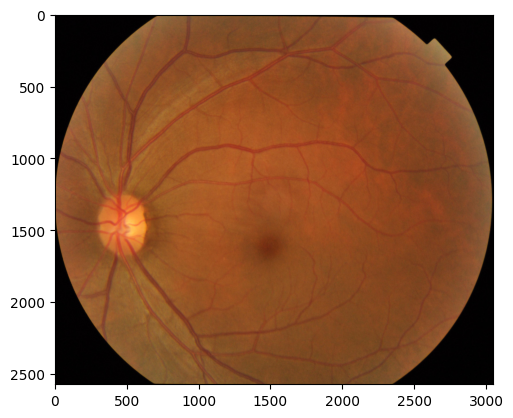

In [10]:
# visualising the same image id
img = image.load_img('/content/drive/MyDrive/Fundus image dataset/splitted/train/Normal optic cup/1ffa9627-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(img)



In [11]:
cv2.imread('/content/drive/MyDrive/Fundus image dataset/splitted/train/Large optic cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG').shape




(1900, 2300, 3)

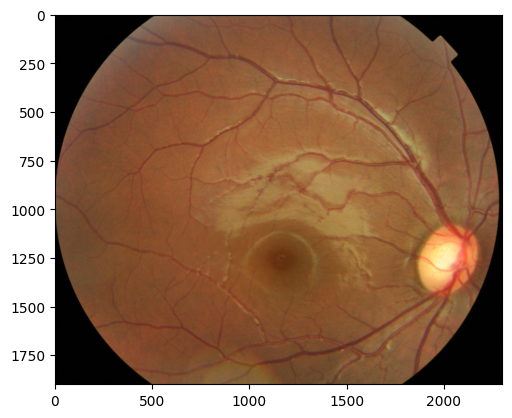

In [12]:
img = image.load_img('/content/drive/MyDrive/Fundus image dataset/splitted/train/Large optic cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG')

plt.imshow(img)


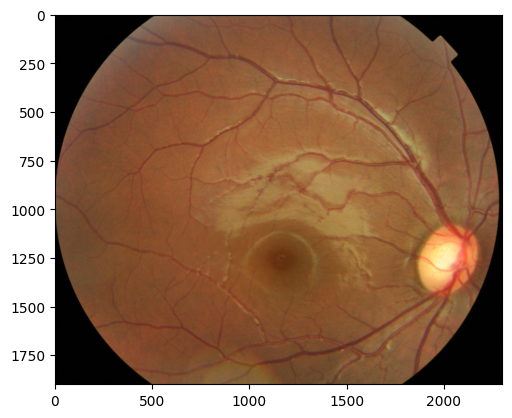

In [13]:
img = image.load_img('/content/drive/MyDrive/Fundus image dataset/Large optic cup/1ffa9493-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(img)


In [14]:
train = ImageDataGenerator(rescale = 1./255)
val = ImageDataGenerator(rescale = 1./255)

In [15]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Fundus image dataset/splitted/train',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = val.flow_from_directory('/content/drive/MyDrive/Fundus image dataset/splitted/val',
                                          target_size =(200,200),
                                          batch_size=3,
                                          class_mode = 'binary')


Found 61 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


In [16]:
train_dataset.class_indices

{'Large optic cup': 0, 'Normal optic cup': 1}

In [17]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape= (200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(512, activation ='relu'),
                                  tf.keras.layers.Dense(1, activation='sigmoid')])


In [19]:
model.compile(loss = 'binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [21]:
history = model.fit(train_dataset,
                      steps_per_epoch=5,
                      epochs=14,
                      validation_data=validation_dataset)

Epoch 1/14
5/5 [==============================] - 8s 2s/step - loss: 0.7265 - accuracy: 0.9231 - val_loss: 0.5694 - val_accuracy: 0.6667
Epoch 2/14
5/5 [==============================] - 6s 1s/step - loss: 0.4121 - accuracy: 0.8000 - val_loss: 0.6352 - val_accuracy: 0.4444
Epoch 3/14
5/5 [==============================] - 5s 1s/step - loss: 0.1268 - accuracy: 0.9231 - val_loss: 0.8024 - val_accuracy: 0.7037
Epoch 4/14
5/5 [==============================] - 5s 1s/step - loss: 0.5105 - accuracy: 0.7692 - val_loss: 0.8818 - val_accuracy: 0.7037
Epoch 5/14
5/5 [==============================] - 6s 1s/step - loss: 0.5182 - accuracy: 0.8000 - val_loss: 0.5958 - val_accuracy: 0.4444
Epoch 6/14
5/5 [==============================] - 5s 1s/step - loss: 0.2695 - accuracy: 0.9333 - val_loss: 0.8056 - val_accuracy: 0.7037
Epoch 7/14
5/5 [==============================] - 5s 1s/step - loss: 0.5636 - accuracy: 0.8000 - val_loss: 0.4530 - val_accuracy: 0.7778
Epoch 8/14
5/5 [=========================

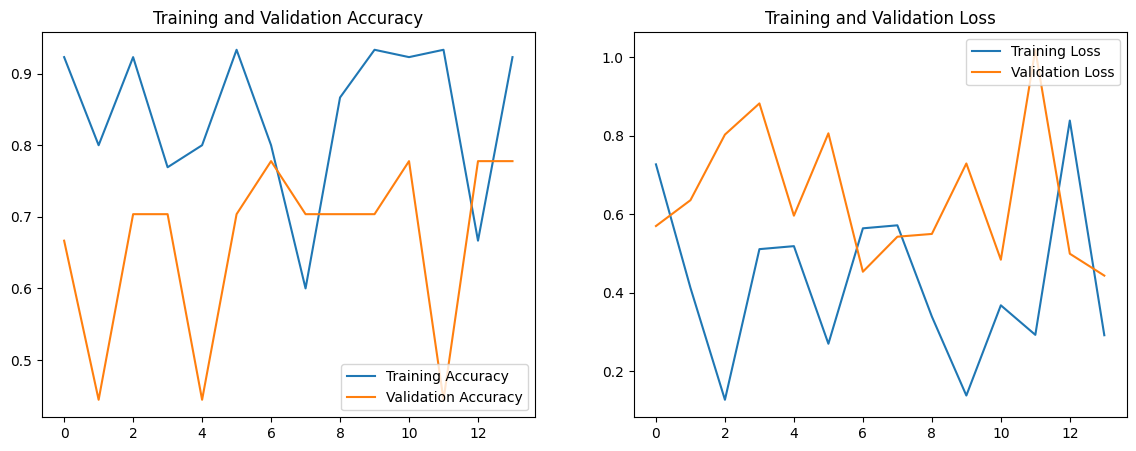

In [22]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:

test_model = model.evaluate(validation_dataset)
print('The testing accuracy is :',test_model[1]*100, '%')

9/9 [==============================] - 1s 143ms/step - loss: 0.4431 - accuracy: 0.7778
The testing accuracy is : 77.77777910232544 %


In [24]:
preds = model.predict(validation_dataset,verbose=1)

9/9 [==============================] - 2s 221ms/step


In [25]:

predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

<Axes: >

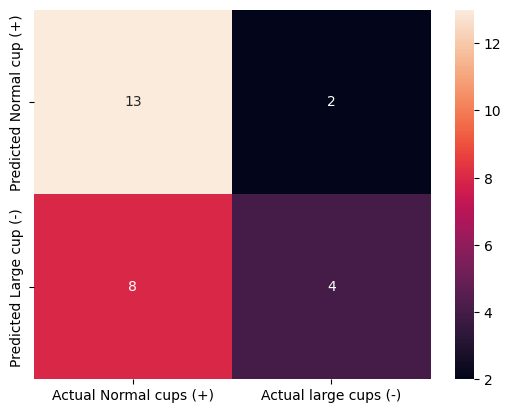

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(validation_dataset.classes, predictions,labels=[0, 1]),index=["Predicted Normal cup (+)", "Predicted Large cup (-)"],
columns=["Actual Normal cups (+)", "Actual large cups (-)"])
sns.heatmap(cm,annot=True,fmt="d")



In [27]:
print(classification_report(y_true=validation_dataset.classes,y_pred=predictions,
                            target_names = ['Normal optic cups', 'Large optic cups']))




                   precision    recall  f1-score   support

Normal optic cups       0.62      0.87      0.72        15
 Large optic cups       0.67      0.33      0.44        12

         accuracy                           0.63        27
        macro avg       0.64      0.60      0.58        27
     weighted avg       0.64      0.63      0.60        27



1/1 [==============================] - 0s 53ms/step


array([[0.]], dtype=float32)

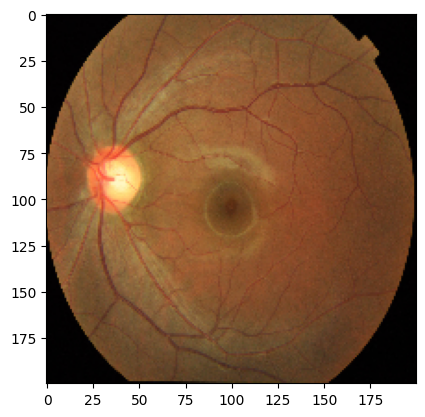

In [28]:
dir_path = '/content/drive/MyDrive/Fundus image dataset//Large optic cup'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size = (200,200))
    plt.imshow(img)
    plt.show

X=image.img_to_array(img)
X = np.expand_dims(X, axis=0)
images=np.vstack([X])
val=model.predict(images)
if val==0:
  print=("Normal optic cup")
else:
  print=("Large optic cup")
model.predict(images)
